## Ergodicidad y el método de Metropolis-Hastings

En nuestra lección anterior:
- Introducimos las cadenas de Markov como una generalización a la teoría de probabilidad con variables aleatorias dependientes.
- Las cadenas de Markov poseen la propiedad de **memoria corta**.
- Se pueden representar usando grafos.
- El objeto de mayor importancia es la **matriz de transición $\mathbf{Q}$**, la cual describe la cadena de Markov.
- Obtuvimos una **ecuación dinámica** de la evolución de los posibles estados de una cadena de Markov, la cual **preserva la probabilidad**.
- Estudiamos los **estados estacionarios**; los cuales existen, son únicos y convergen dependiendo de ciertas condiciones:
    * Lo anterior se cumple para cadenas **irreducibles y aperiodícas** (positivas recurrentes).
    * El balance global es una condición necesaria, pero no suficiente, para un estado estacionario con respecto a su **existencia**.
    * El balance detallado es una condición suficiente, pero no necesaria, para un estado estacionario con respecto a su **existencia**.

En esta lección daremos un paso más: construiremos **métodos generales de muestreo** basados en cadenas de Markov que permiten **simular distribuciones de probabilidad complejas**, incluso cuando no podemos escribir ni normalizar $\vec{P}^*$ de forma analítica.

El método más conocido y poderoso en este contexto es el **algoritmo de Metropolis–Hastings**, base de los métodos **MCMC (Markov Chain Monte Carlo)**.

### Ergodicidad y equilibrio en cadenas de Markov

Cuando se cumple la condición de balance detallado
$$
Q_{nm} P^*_m = Q_{mn} P^*_n,
$$
decimos que la cadena de Markov es **reversible temporal**. 
- Bajo esta condición se puede probar que si un estado inicial se escoje de acuerdo con $P^*_n$, entonces la secuencia de estados moviéndose hacia atrás en el tiempo también serán una cadena de Markov con probabilidades de transición $Q_{nm}$.

Ahora hablaremos sobre una **condición suficiente para la unicidad y convergencia de un estado estacionario para una cadena de Markov**. 

Sea $\{X_t\}_{t \ge 0}$ una cadena de Markov en un espacio de estados $\mathcal{S}$ (finito o numerable), con matriz de transición $Q_{nm} = P\{ X_{t+1} = n | X_t = m \}$.

Si definimos $P_n(t) = P \{ X_t = n \}$, sabemos que
$$
P_n(t + 1) = \sum_n Q_{nm} P_m(t) \implies \vec{P}(t + 1) = \mathbf{Q} \vec{P}(t).
$$
Sabemos que si
$$
\vec{P}(0) \sim \vec{P}^*
$$
entonces se tiene que cumplir por construcción que para todo $t$
$$
\vec{P}(t) \sim \vec{P}^*,
$$
es decir, $\vec{P}^*$ es **invariante bajo la dinámica de la cadena**. Esto es lo que implica que $\vec{P}^*$ sea una distribución (o estado, dependiendo de la literatura) estacionario, lo cual es equivalente a $\vec{P}^* = \mathbf{Q} \vec{P}^*$.

- Adicionalmente, para toda distribución inicial $\vec{W}$, si la distribución $\mathbf{Q}^t \vec{W}$ **converge** a $\vec{P}^*$ cuando $t \to \infty$ entonces decimos que que $\vec{P}^*$ es **la distribución (o estado) de equilibrio**.

Formalmente,
$$
\lim_{t\to\infty} \|\mathbf{Q}^t \vec{W} - \vec{P}^* \|_{\text{TV}} = 0,
$$
donde $\|\cdot\|_{\text{TV}}$ es la distancia total de variación. Note que, en general, esto no corresponde a la norma de la diferencia de dos vectores, dado que los vectores estrictamente hablando representan **distribuciones de probabilidad**.

### Condiciones para la ergodicidad

Decimos que una cadena es **ergódica** si cumple tres condiciones fundamentales:

1. **Irreducibilidad:**  
   Para todo $n, m \in \mathcal{S}$, existe un $t$ tal que $(\mathbf{Q}^t)_{nm} > 0$.  
   Es decir, todos los estados se comunican: cualquier estado puede alcanzarse eventualmente desde cualquier otro.

2. **Aperiodicidad:**  
   El periodo de un estado $n$ con $i \geq 1$ se define como  
   $$
   d(i) = {\textrm{mcd}}\{ n \ge 1 : (\mathbf{Q}^i)_{nn} > 0 \}.
   $$
   La cadena es aperiódica si $d(i) = 1$ para todo $n$ (o al menos para un estado del que todos los demás sean accesibles).

3. **Existencia de distribución estacionaria:**  
   Debe existir $\vec{P}^*$ con $\vec{P}^* = \mathbf{Q} \vec{P}^*$ y $\sum_i P^*_i = 1$.

Cuando estas tres propiedades se cumplen simultáneamente, la cadena es **ergódica** y se cumple el **teorema de convergencia ergódica**.

Ross (Simulation, 5th Ed.) da una definición adicional de una cadena de Markov irreducible y aperiódica más sencilla (menos matemática):
#### Definifición:
Se dice que una cadena de Markov es irreducible y aperiódica si para algún $n \geq 0$ y algún estado $j$,
$$
\boxed{P\{ X_n = j | X_0 = j \} > 0 \quad {\textrm{y}}\quad P\{ X_{n+1} = j | X_0 = j \} > 0.}
$$

### Teorema ergódico para cadenas de Markov

Sea $\{X_t\}_{t \geq 0}$ una cadena de Markov irreducible, aperiódica, con distribución estacionaria $\vec{P}^*$.  
Entonces, para cualquier función acotada $f:\mathcal{S}\to\mathbb{R}$,

$$
\lim_{T\to\infty} \frac{1}{T}\sum_{t=1}^T f(\vec{P}(t)) = E[f(\vec{P}^*)],
$$

con probabilidad 1.

Esto significa que los **promedios temporales** (evaluados a lo largo de la cadena) convergen a los **promedios espaciales** (con respecto a $\vec{P}^*$).  

En física, este resultado **justifica que una simulación suficientemente larga puede reemplazar al promedio de ensamble sobre todas las configuraciones posibles.**

#### Expansión sobre la base de autovectores

La prueba del teorema utiliza conceptos de la teoría de probabilidad más avanzados de los que hemos estudiado hasta el momento, así que no realizaremos la prueba de forma explícita.

Con base en la irreducibilidad y aperiodicidad de una cadena de Markov, esta condición se traduce en la teoría de matrices a que la matriz de transición $\mathbf{Q}$ es **primitiva**, lo cual implica que alguna potencia de $\mathbf{Q}$ tiene todas las entradas *estrictamente positivas*. El teorema de Perron-Frobenius indica que para matrices primitivas para un espacio de muestreo $m \in \mathcal{S}$: 
- La matriz $\mathbf{Q}$ tiene solamente un autovalor igual a $\lambda_1 = 1$.
- Todos los otros $m - 1$ autovalores satisfacen $|\lambda_i| < 1$, $i = 2, 3, \cdots, m$.
- El autovector correspondiente a $\lambda_1 = 1$ es único y todas sus entradas son positivas (corresponde a $\vec{P}^*)$.

Este teorema nos da mucha información acerca de la estructura de una **descomposición de autovectores** de cualquier distribución inicial $\vec{P}(0)$. Como la base de autovectores $\mathbf{Q}$ 
$$
\mathbf{Q} \vec{x}_i = \lambda_i \vec{x}_i 
$$
es una base completa, esto implica que para cualquier distribución inicial $\vec{P}(0)$ se puede escribir como una combinación lineal
$$
\vec{P}(0) = c_1 \vec{x}_1 + c_2 \vec{x}_2 + \cdots + c_m \vec{x}_m,
$$
con $c_1, \cdots, c_m$ coeficientes de la expansión. Esto implica que 
\begin{align}
\mathbf{Q} \vec{P}(0) &= c_1 \mathbf{Q} \vec{x}_1 + c_2 \mathbf{Q} \vec{x}_2 + \cdots + c_m \mathbf{Q} \vec{x}_m\\
&= c_1 \lambda_1 \vec{x}_1 + c_2 \lambda_2 \vec{x}_2 + \cdots + c_m \lambda_m \vec{x}_m.
\end{align}
En general,
$$
\mathbf{Q}^t \vec{P}(0) = c_1 \lambda_1^t \vec{x}_1 + c_2 \lambda_2^t \vec{x}_2 + \cdots + c_m \lambda_m^t \vec{x}_m.
$$
Sin embargo, sabemos que $\lambda_1 = 1$ y $|\lambda_i| < 1$, lo cual implica que
$$
\lim_{t \to \infty} \mathbf{Q}^t \vec{P}(0) = c_1 \vec{x}_1 \propto \vec{P}^*,
$$
donde la constante $c_1$ se escoge tal que la distribución esté normalizada. 

### El método de Metropolis-Hastings

Tanto en física como en matemáticas y computación, un objetivo que aparece muy a menudo es

> Construir un proceso estocástico que, al evolucionar en el tiempo, visite estados con una frecuencia proporcional a su probabilidad en la distribución deseada $\vec{P}^*$.

Esa es precisamente la idea central de los **métodos de Monte Carlo basados en cadenas de Markov**.

Para realizar esta tarea, podemos utilizar el **método de Metropolis-Hastings**, el cual está desarrollado con base en la condición de **balance detallado**. Recordemos que el balance detallado es una condición suficiente para la existencia 

#### Algoritmo

Sean $b_j$ números positivos con $j = 1, \cdots, m$ y $B = \sum_{j=1}^m b_j$. Supongamos que $m$ es un número muy grande y $B$ es difícil de calcular. Queremos simular una secuencia de variables aleatorias con PMF dada por un estado estacionario
$$
P^*_j = \frac{b_j}{B},\quad j = 1,\cdots,m.
$$
Una forma de atacar este problema es encontrando una cadena de Markov que sea sencilla de simular y que **sus probabilidades estacionarias correspondan a $P^*_j$**.

Sea $\mathbf{Q}$ una matriz de transición perteneciente a una cadena de Markov irreducible, sobre el espacio de muestreo $1, \cdots, m$. $Q_{ji}$ corresponde a la entrada de la fila $j$ y columna $i$ de la matriz de transición. 

Ahora definimos una cadena de Markov $\{ X_n, n \geq 0 \}$ tal que:
- Cuando $X_n = i$, una variable aleatoria $X$ tal que $P\{ X = j \} = Q_{ji}$, con $j = 1,\cdots, m$, es generada.
- Si $X = j$, entonces hacemos que $X_{n+1}$ sea igual a $j$ con probabilidad $\alpha_{ij}$ o igual a $i$ con probabilidad $1 - \alpha_{ij}$.
- Bajo estas condiciones, la secuencia de estados generada corresponde a una cadena de Markov con probabilidades de transición $R_{ij}$, tal que
\begin{align}
  R_{ij} &= Q_{ji} \alpha_{ij},\quad {\textrm{si}}\;j \neq i \\
  R_{ii} &= Q_{ii} + \sum_{k \neq i} Q_{ki}(1 - \alpha_{ik})
\end{align}

De esta forma la cadena de Markov será temporal reversible y con probabilidades $P^*_j$ si
$$
P^*_i R_{ij} = P^*_j R_{ji}\quad \forall j \neq i,
$$
lo cual es equivalente a
$$
P^*_i Q_{ji} \alpha_{ij} = P^*_j Q_{ij} \alpha_{ji}.
$$
Se puede confirmar que si la relación anterior se satisface, entonces se debe cumplir que
$$
\alpha_{ij} = {\textrm{min}}\Bigg( \frac{P^*_j Q_{ij}}{P^*_i Q_{ji}}, 1 \Bigg) = {\textrm{min}}\Bigg( \frac{b_j Q_{ij}}{b_i Q_{ji}}, 1 \Bigg).
$$
Note que, crucialmente, para realizar este desarrollo **no necesitamos $B$ de forma explícita ni implícita**, basta con los valores de probabilidad $b_j$.  

El algoritmo anterior se puede solidificar de la siguiente forma:
1. Escoger una matriz de transición **irreducible** $\mathbf{Q}$ con probabilidades de transición $Q_{ji}$; $i, j = 1, \cdots m$ y algún entero $k$ entre $1$ y $m$.
2. Sea $n = 0$ y $X_0 = k$.
3. Generar una variable aleatoria $X$ tal que $P\{ X = j \} = Q_{j X_n}$ y generar un número de una distribución uniforme $U \in (0, 1)$
4. Si
   $$
   U < \frac{b_X Q_{X_n X}}{b_{X_n} Q_{X X_n}}
   $$
   Entonces $S = X$, de lo contrario, $S = X_n$
5. Actualizar: $n = n + 1$, $X_n = S$
6. Ir a 3. 

En el caso simétrico, en el cual $Q_{ij} = Q_{ji}$ (por ejemplo para un camino aleatorio uniforme), note que el paso 4. se simplifica a $U < \frac{b_X}{b_{X_n}}$, es decir, a comparar probabilidades de la distribución estacionaria deseada. En el contexto físico, esto significa que los movimientos hacia **estados de menor energía** ($E_j < E_i$) siempre se aceptan, y los movimientos hacia **mayor energía** se aceptan con probabilidad $e^{-\beta (E_j-E_i)}$. A esto se le conoce como el **criterio de Metropolis** (1953).

#### Comentarios

- La cadena resultante es **ergódica**: cualquier configuración puede alcanzarse a partir de otra con suficiente tiempo.  
- A bajas temperaturas ($\beta$ grande), las configuraciones tienden a alinearse (mínima energía).  
- A altas temperaturas, el sistema se desordena (máxima entropía).  

### Ejemplo: Muestreo de densidades de probabilidad - partícula unidimensional 

El método de Metrolois-Hastings es de **suma importancia** cuando queremos generar ciertas distribuciones de equilibrio en la Física. Su poder yace en generar cadenas de Markov que se comportan de forma ergódica y mediante esta propiedad estimar parámetros físicos.

Sin embargo, para el ejemplo de esta lección veremos como generar una distribución matemática sencilla, para luego estudiar sistemas físicos más complejos.

Considere una partícula unidimensional sin confinar.  
Su densidad de probabilidad objetivo (no normalizada) es
$$
f(x) = e^{-x^2/2},\qquad 0 \le x \le \infty,
$$
Desde el punto de vista discreto, básicamente queremos 
$$
\vec{P}^* \propto f(x),
$$
donde sabemos que el método de Metropolis-Hastings da lugar a distribuciones estacionarias módulo una constante.

Aplicaremos el método para muestrear una cadena de Markov que se tiene como distribución estacionaria nuestra función objetivo. Haremos una inspección visual de la distribución obtenida.

Primero definimos los parámetros de nuestra simulación discreta:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

L = 5.0 # longitud espacial de la grilla
M = 101 # puntos de discretización de la grilla
x = np.linspace(0, L, M)
dx = x[1] - x[0]

En la versión discreta, nuestra distribución objetivo tiene la forma:

In [4]:
f_vals = np.exp(-0.5 * x**2)
pi_unnorm = f_vals.copy()
pi_discrete = pi_unnorm / np.sum(pi_unnorm) # Note que la distribución tiene que estar normalizada

La primera etapa del algoritmo, corresponde a definir una matriz de transición $\mathbf{Q}$ la cual tiene que pertenecer a una **cadena de Markov irreducible y aperiódica**. Naturalmente, existen muchas que podemos utilizar e, inclusive, podríamos utilizar distribuciones de probabilidad contínuas para este efecto. De hecho, lo único que necesitamos es que la distribución de probabilidad propuesta contenga una forma conocida para la probabilidad condicional $Q_{ij}$. Es común utilizar la distribución de probabilidad normal.

Para efectos de nuestro primer ejemplo práctico, utilizaremos una matriz de transición discreta que sea conocida como irreducible y aperiódica. Un ejemplo corresponde a la matriz que representa un grafo en el todos los nodos tienen conexión con su nodo de la derecha e izquierda, con excepción del nodo inicial y final, que solo poseen una conexión. Esto da lugar a una matriz de transición irreducible y aperiódica, lo cual implica que posee un estado estacionario único. Es fácil visualizar que dicha matriz se implementa de la siguiente forma:

In [5]:
def qMatrix(M):
    Q = np.zeros((M,M))
    for i in range(M):
        left = i - 1 if i - 1 >= 0 else i
        right = i + 1 if i + 1 < M else i
        Q[i,left] += 1/3
        Q[i,i]    += 1/3
        Q[i,right]+= 1/3

    return Q

Por ejemplo, para 5 nodos $(M = 5)$, tenemos:

In [6]:
print(qMatrix(5))

[[0.66666667 0.33333333 0.         0.         0.        ]
 [0.33333333 0.33333333 0.33333333 0.         0.        ]
 [0.         0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.33333333 0.33333333 0.33333333]
 [0.         0.         0.         0.33333333 0.66666667]]


Con esto ya tenemos lo suficiente para implemetar nuestro algortimo de Metrópolis-Hastings. **Note que nuestra matriz de transición $\mathbf{Q}$ es simétrica**, lo cual se puede utilizar para simplificar el algoritmo.

Escriba una función que simula la cadena de Markov usando el método de Metropolis-Hastings (para esto puede ser muy útil la función `np.random.choice`):

In [13]:
# Implemente aquí el método MH usando el algoritmo de los puntos 1. a 6.
def MetHastChain(pi, Q, N = 400_000, x0 = None):
    
    M = Q.shape[0]

    if x0 is None:
        x0 = M // 2

    assert x0 <= M, "La posicion inicial no puede ser fuera de la grilla"

    chain = np.zeros(N, dtype = int)
    chain[0] = x0
    n = 0
    
    for t in range(1, N):
        x = np.random.choice(M, p=Q[:, chain[t-1]])
        u = np.random.uniform()

        numer = pi[x] * Q[chain[t-1], x] 
        denom = pi[chain[t-1]] * Q[x, chain[t-1]]
        alpha = 1.0 if denom == 0 else np.min((1, (numer / denom)))

        if u < alpha:
            chain[t] = x

        else:
            chain[t] = chain[t-1]
    
    return chain

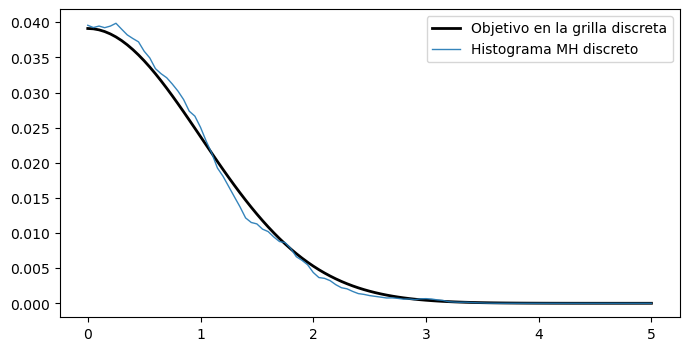

In [14]:
# Invoque el algoritmo para generar una cadena
chainx = MetHastChain(pi_unnorm, qMatrix(M))
# Esto genera un histograma de los datos generados con la cadena
hist_probs = np.bincount(chainx, minlength=M) / len(chainx)

# Y finalmente realizamos un hisograma
plt.figure(figsize=(8,4))
plt.plot(x, pi_discrete, 'k-', lw=2, label='Objetivo en la grilla discreta')
plt.plot(x, hist_probs,  lw=1, alpha=0.9, label='Histograma MH discreto')
plt.legend();